# string model 3 literature

In [1]:
import boolean2_helper as bm
import network_drawer as draw
from model_builder_3 import string2definition, add_mtb2definition

In [2]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']
complexes = ['ESCRT_complexes', 'MHC_I_complexes', 'vATPase_complexes', 'ImportinBetaAlpha_complexes']
processes = ['Phagosome_maturation', 'Phagosome_acidification', 'Phagolysosome_assembly']
mtb = sorted(mtb)
hit = sorted(hit)
complexes = sorted(complexes)
processes # maturation at the top 
runs = 50

model 3

FIG 1


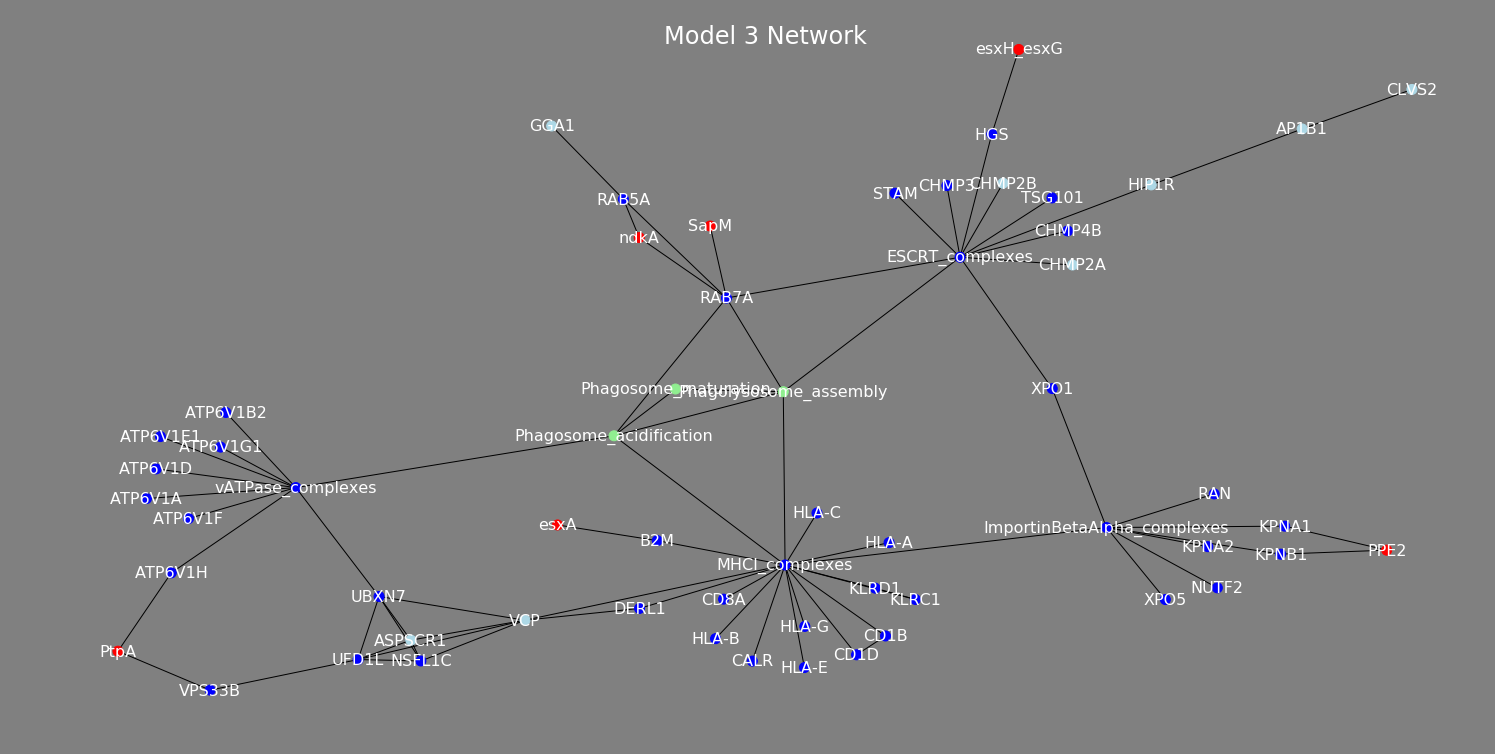

In [3]:
print "FIG 1"
draw.draw_edgelists('model2and3-edgelist.csv', # model 3 changes just at the process level
                    add_mtb='mtb-edgelist.csv', 
                    add_process='process-edgelist-3.csv',
                    highlight=hit,
                    title='Model 3 Network'
              )

In [4]:
definition = string2definition('model_3.txt')
hit = [factor for factor in hit if factor in definition]
# print definition

1 mtb on/off

In [ ]:
# heatmap mtb

In [5]:
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', True)
mtb = [factor for factor in mtb if factor in definition_mtb] # just factors modelled for drawing


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [6]:
# run model
models_mtb = bm.run_model(definition_mtb, steps=50, runs=runs)

FIG 2


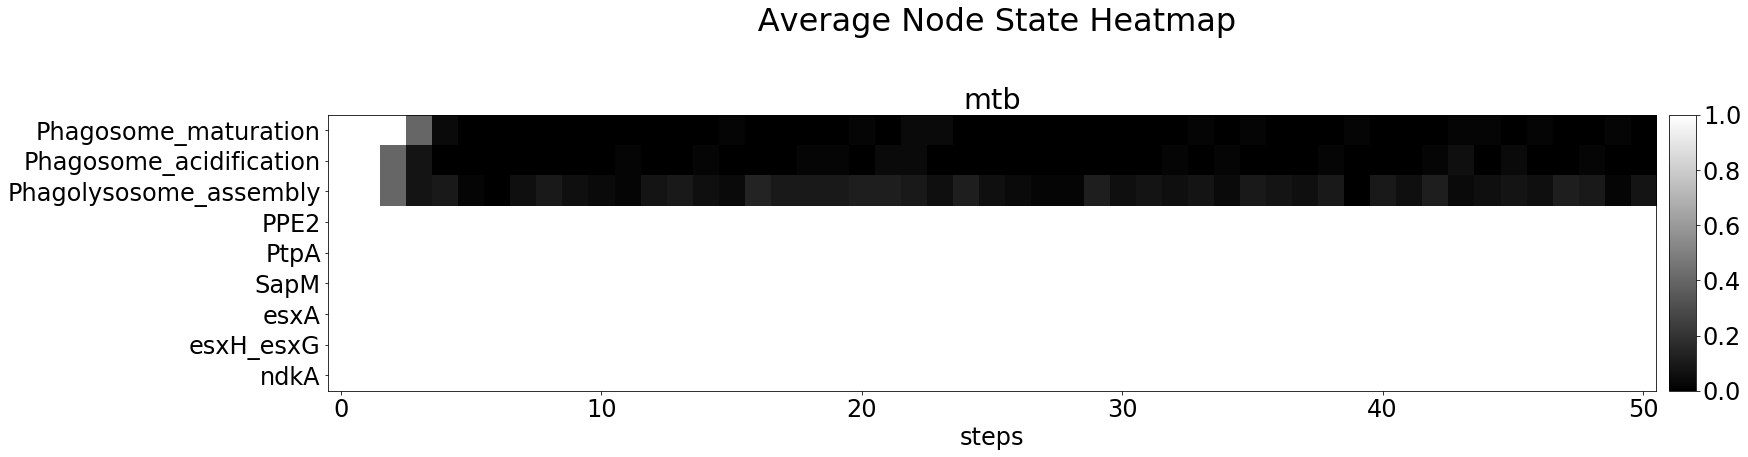

In [67]:
print "FIG 2"
# plot average
avg_mtb = bm.average_models(models_mtb)
bm.plot_maps([avg_mtb],
             titles=['mtb'], 
             nodes = processes + sorted(mtb),
             h = 6.5,
             w = 25,
             top = 0.75,
             bottom=0.16,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

In [21]:
# analyse behaviour
cycles = bm.get_cycles(models_mtb)
print bm.count_cycles(cycles)
print "index, state:", bm.average_cycles(cycles)


('none: 45', 'steady: 5', 'other: 0')
index, state: [2.36 0.1 ]


2 knockouts null 

In [33]:
# heatmap knockouts

In [34]:
definition_knockouts = bm.knockout(definition, hit)
# print definition_knockouts

In [35]:
# runs
models_knockouts = bm.run_model(definition_knockouts, steps=50, runs=runs)

FIG 3


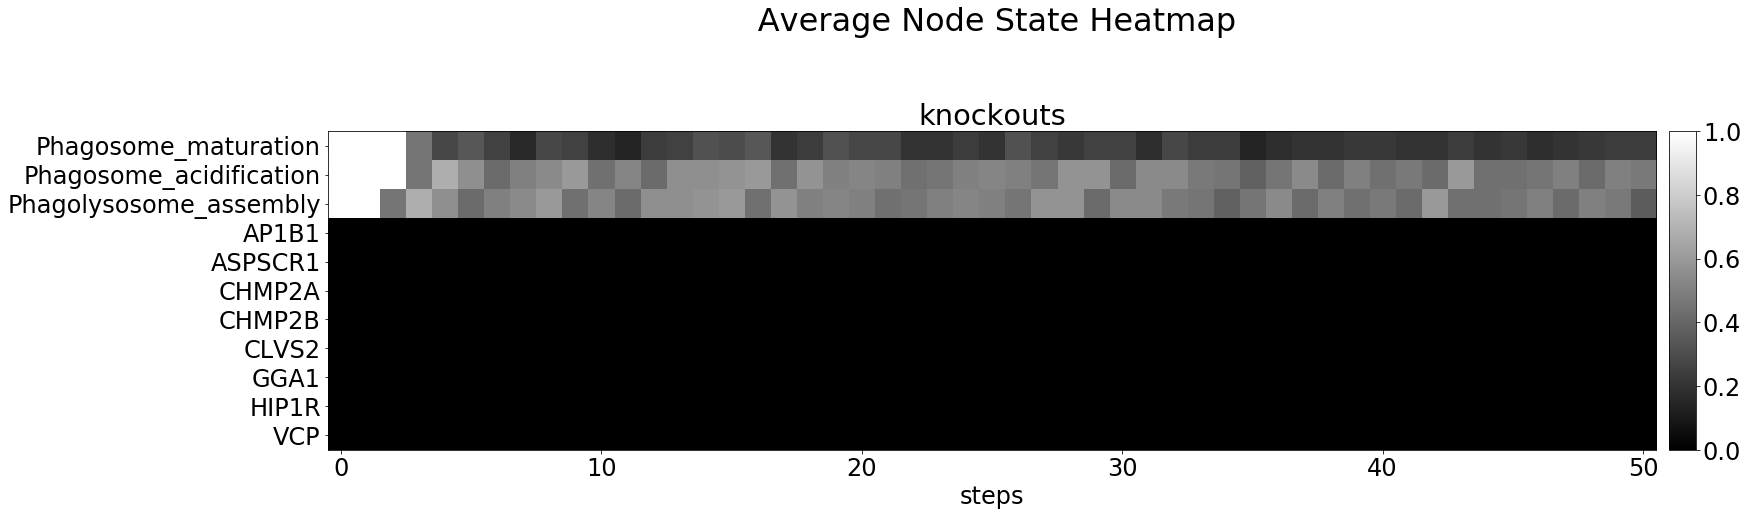

In [69]:
print "FIG 3"
avg_knockouts = bm.average_models(models_knockouts)
bm.plot_maps([avg_knockouts],
             titles=['knockouts'], 
             nodes = processes + sorted(hit),
             h = 7.5,
             w = 25,
             top = 0.75,
             bottom=0.16,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )
# bm.plot_data(avg, nodes = processes + hit, h=5, w=20, fontsize=18, title='Node Heatmap: 100 run average')

In [70]:
# analyse behaviour
cycles = bm.get_cycles(models_knockouts)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)

('none: 0', 'steady: 48', 'other: 2')
[11.08  1.06]


In [71]:
# look at 'other' states

# bm.print_cycles(cycles)
# models[2].report_cycles()

In [ ]:
# heatmap mtb AND knockouts

In [72]:
definition_mtbANDknockouts = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', True) 
# print definition_mtbANDknockouts


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [73]:
# runs
models_mtbANDknockouts = bm.run_model(definition_mtbANDknockouts, steps=50, runs=runs)

FIG 4


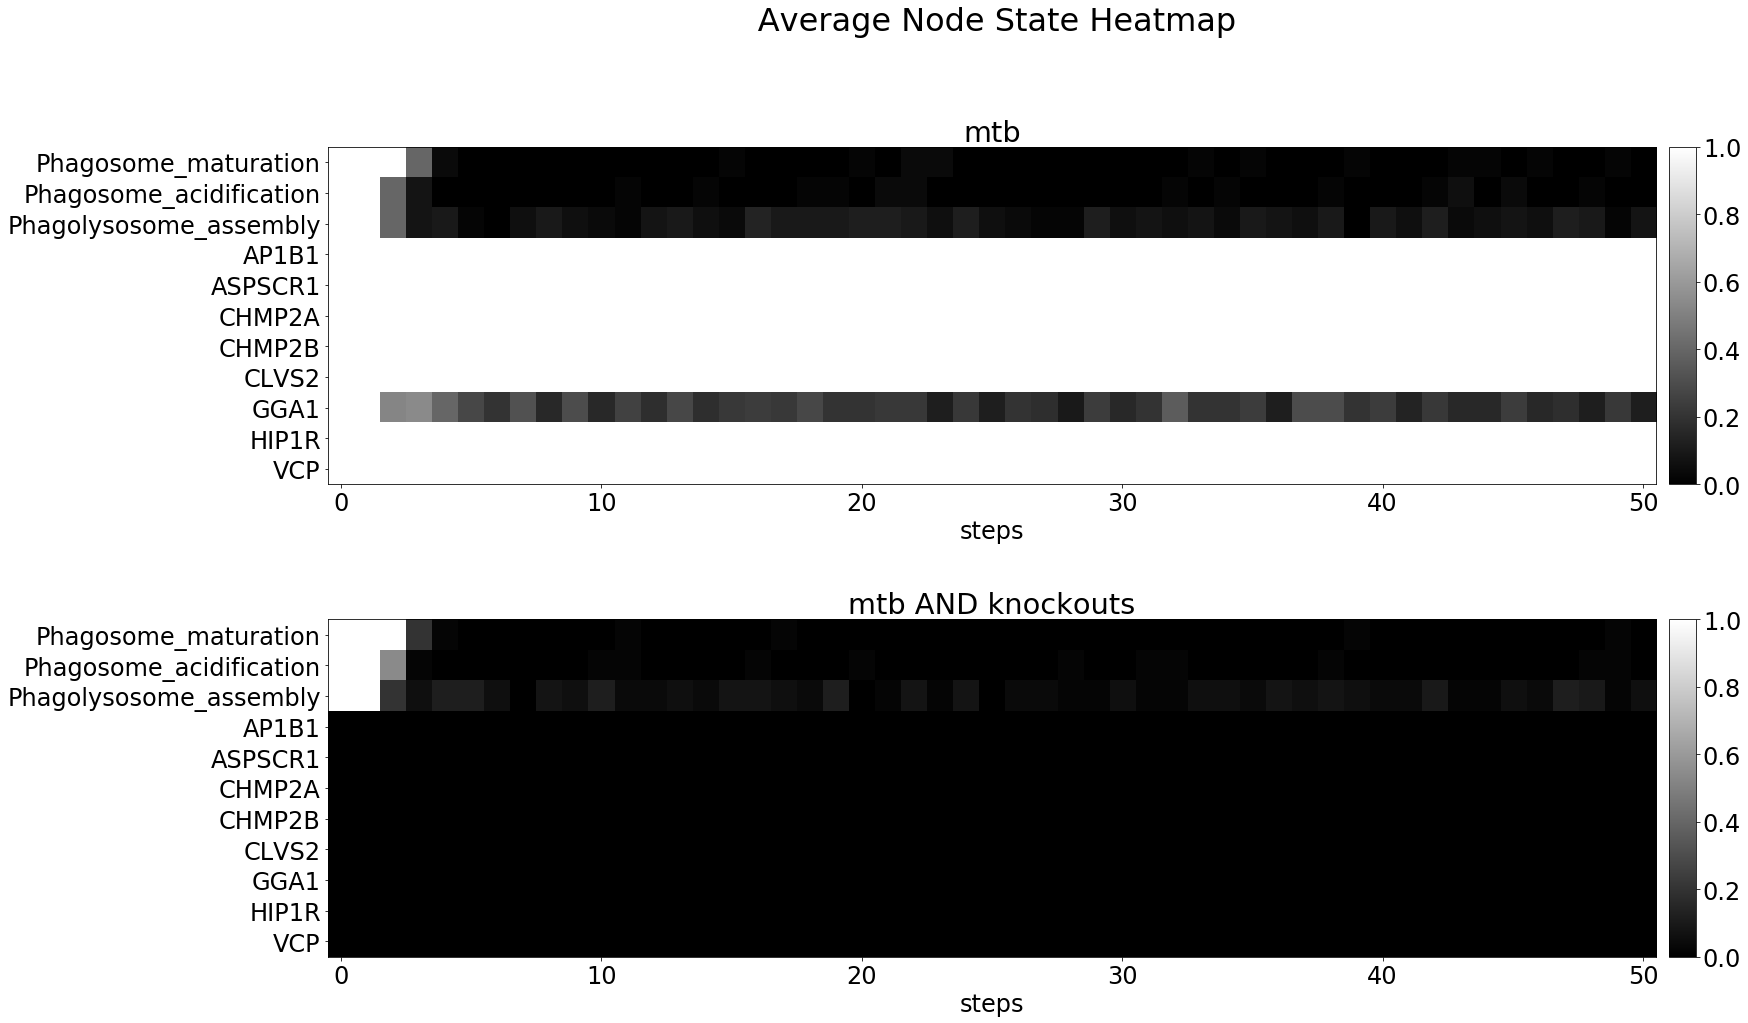

In [77]:
print "FIG 4"
avg_mtbANDknockouts = bm.average_models(models_mtbANDknockouts)
bm.plot_maps([avg_mtb, avg_mtbANDknockouts],
             titles=['mtb','mtb AND knockouts'], 
             nodes = processes + sorted(hit),
             hspace=0.4,
             top = 0.85,
             h = 7.5,
             w = 25,
             bottom=0.1,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

In [78]:
# analyse behaviour
cycles = bm.get_cycles(models_mtbANDknockouts)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
# bm.print_cycles(cycles)

('none: 32', 'steady: 17', 'other: 1')
[6.68 0.38]


In [80]:
# heatmap mtb AND knockouts one by one

In [81]:

avgs_mtbANDknockoutsOneByOne = []
for factor in hit:
    definition_loop = bm.knockout(definition_mtb, [factor])
    models = bm.run_model(definition_loop, steps=50, runs =runs)
    avg = bm.average_models(models)
    avgs_mtbANDknockoutsOneByOne.append(avg)

FIG 5
FIG 5A


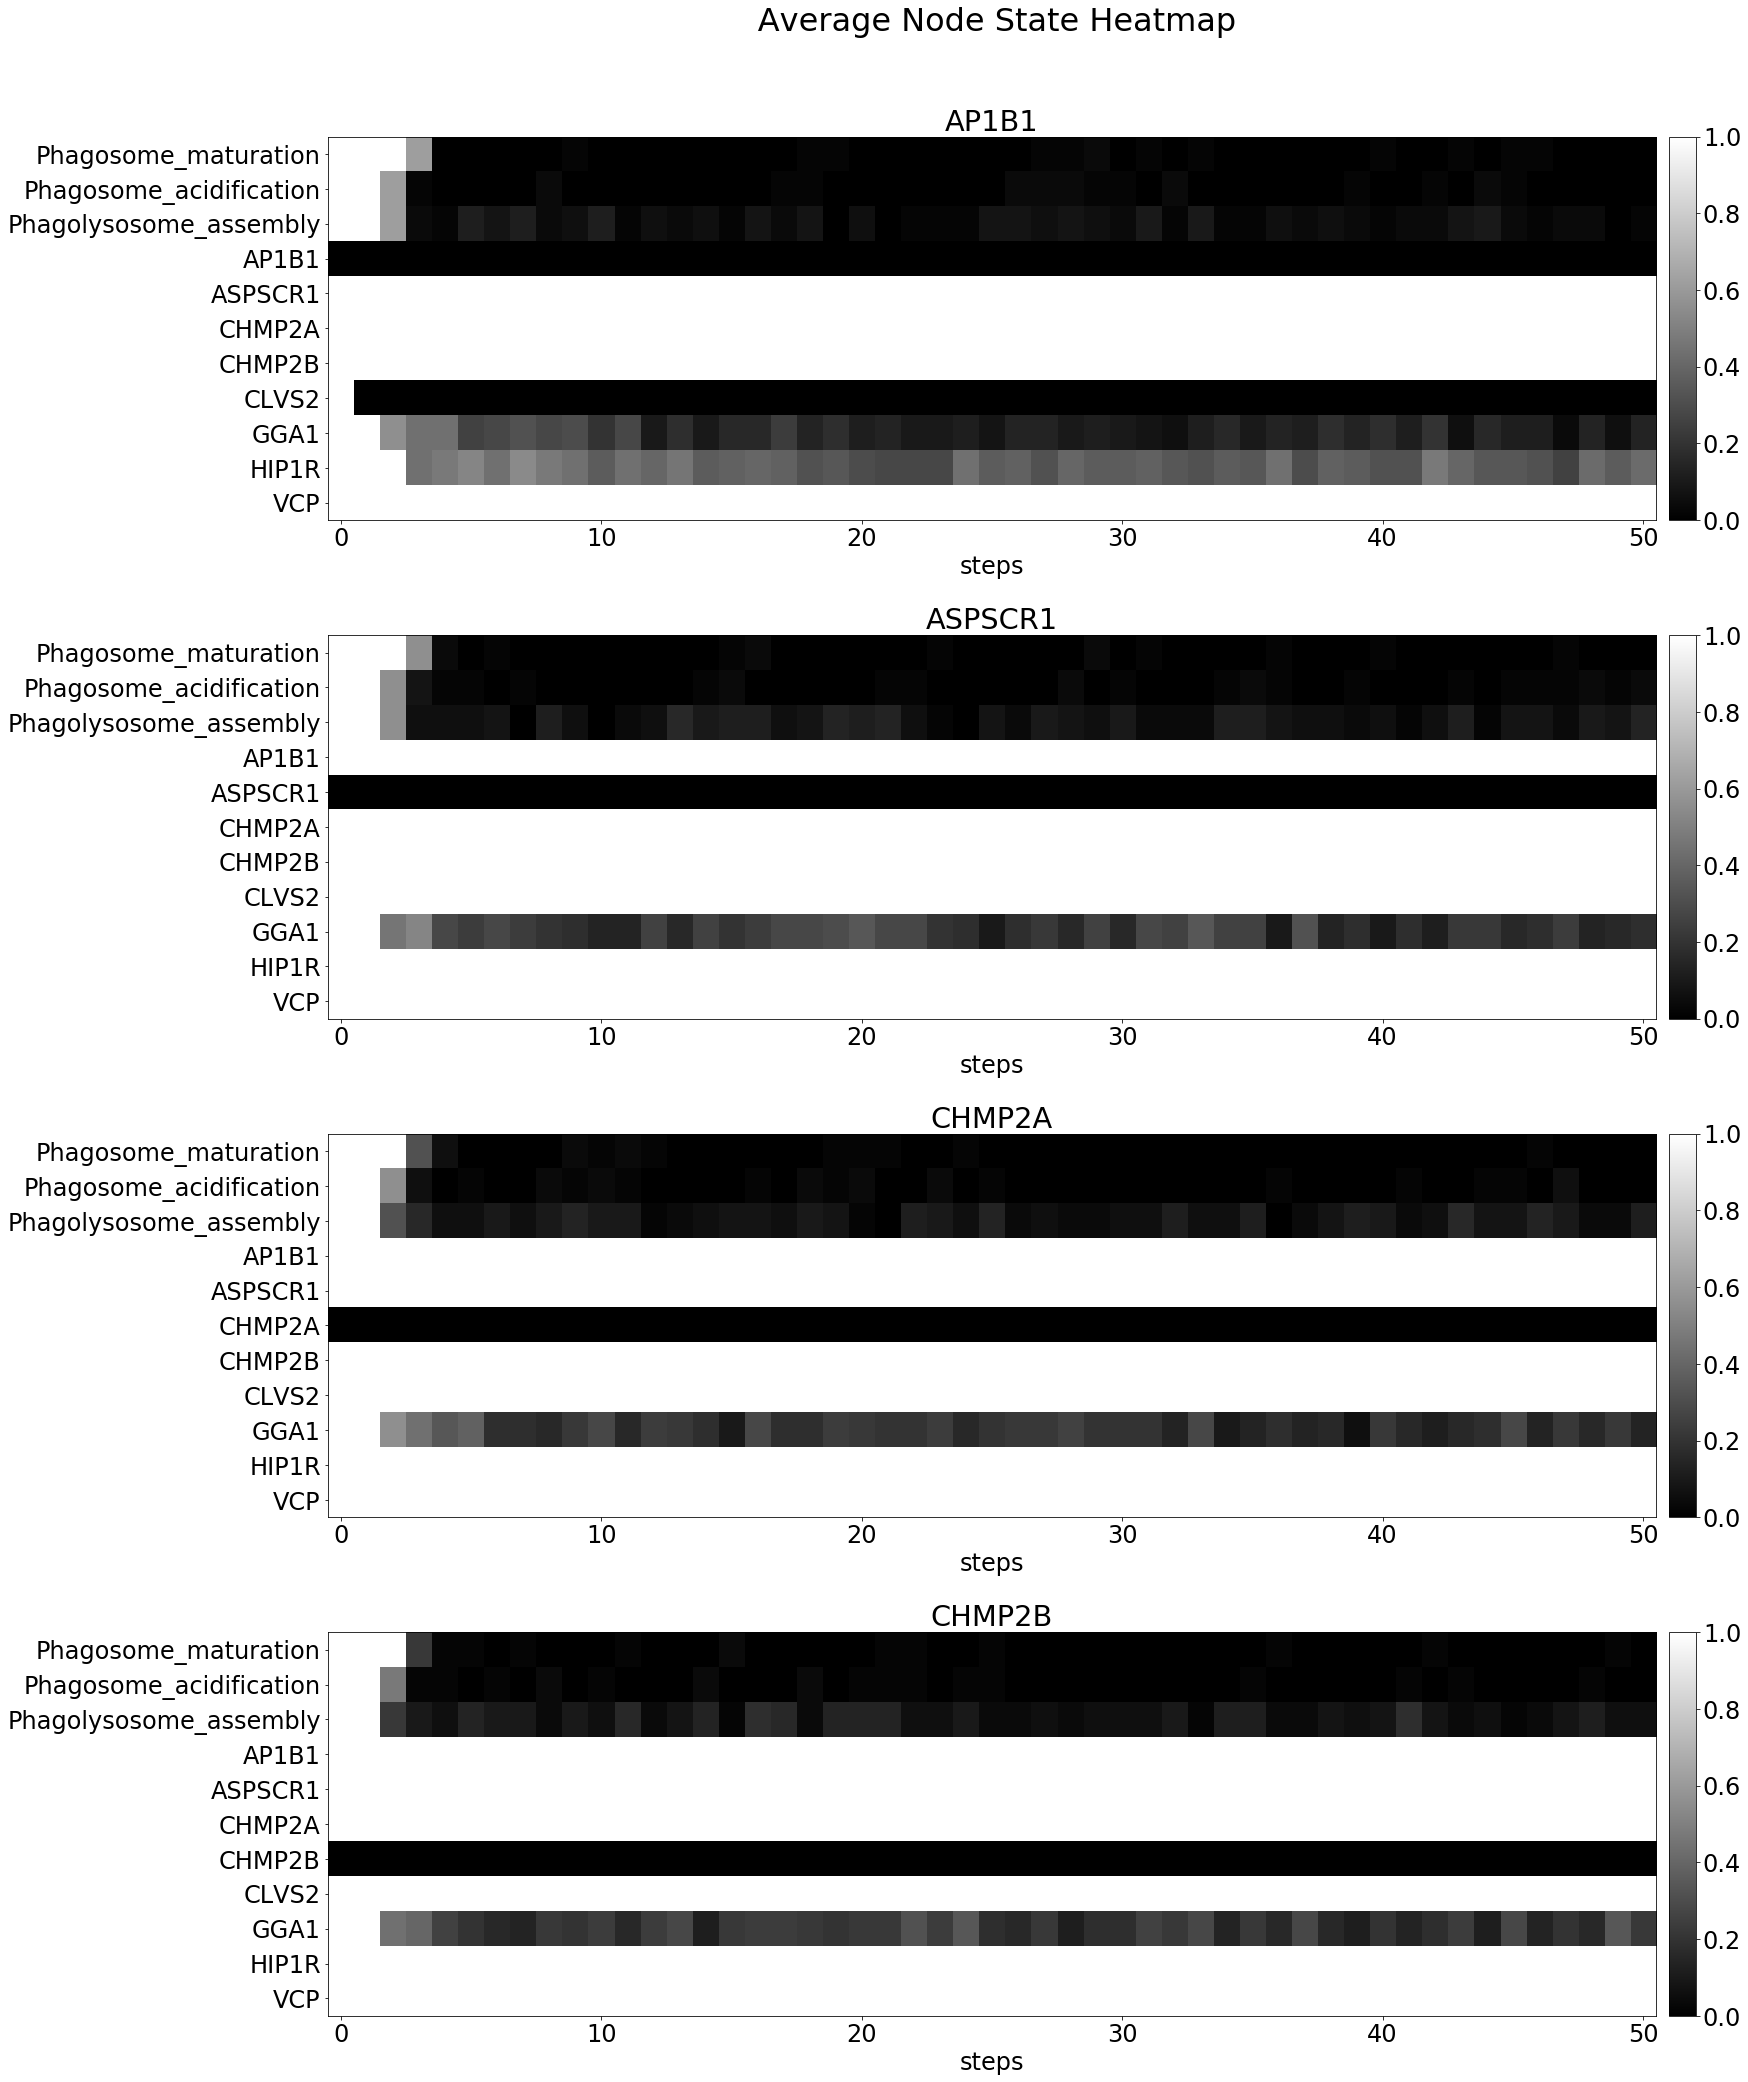

In [83]:
print "FIG 5"
nmodels = len(avgs_mtbANDknockoutsOneByOne)
A = avgs_mtbANDknockoutsOneByOne[:nmodels/2]
B = avgs_mtbANDknockoutsOneByOne[nmodels/2:]

print "FIG 5A"
bm.plot_maps(A,
             titles=hit, 
             nodes = processes + hit,
             
             top = 0.92,
             bottom=0.05,
             hspace = 0.3,            
             h = 7.5,
             w = 25,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

FIG 5B


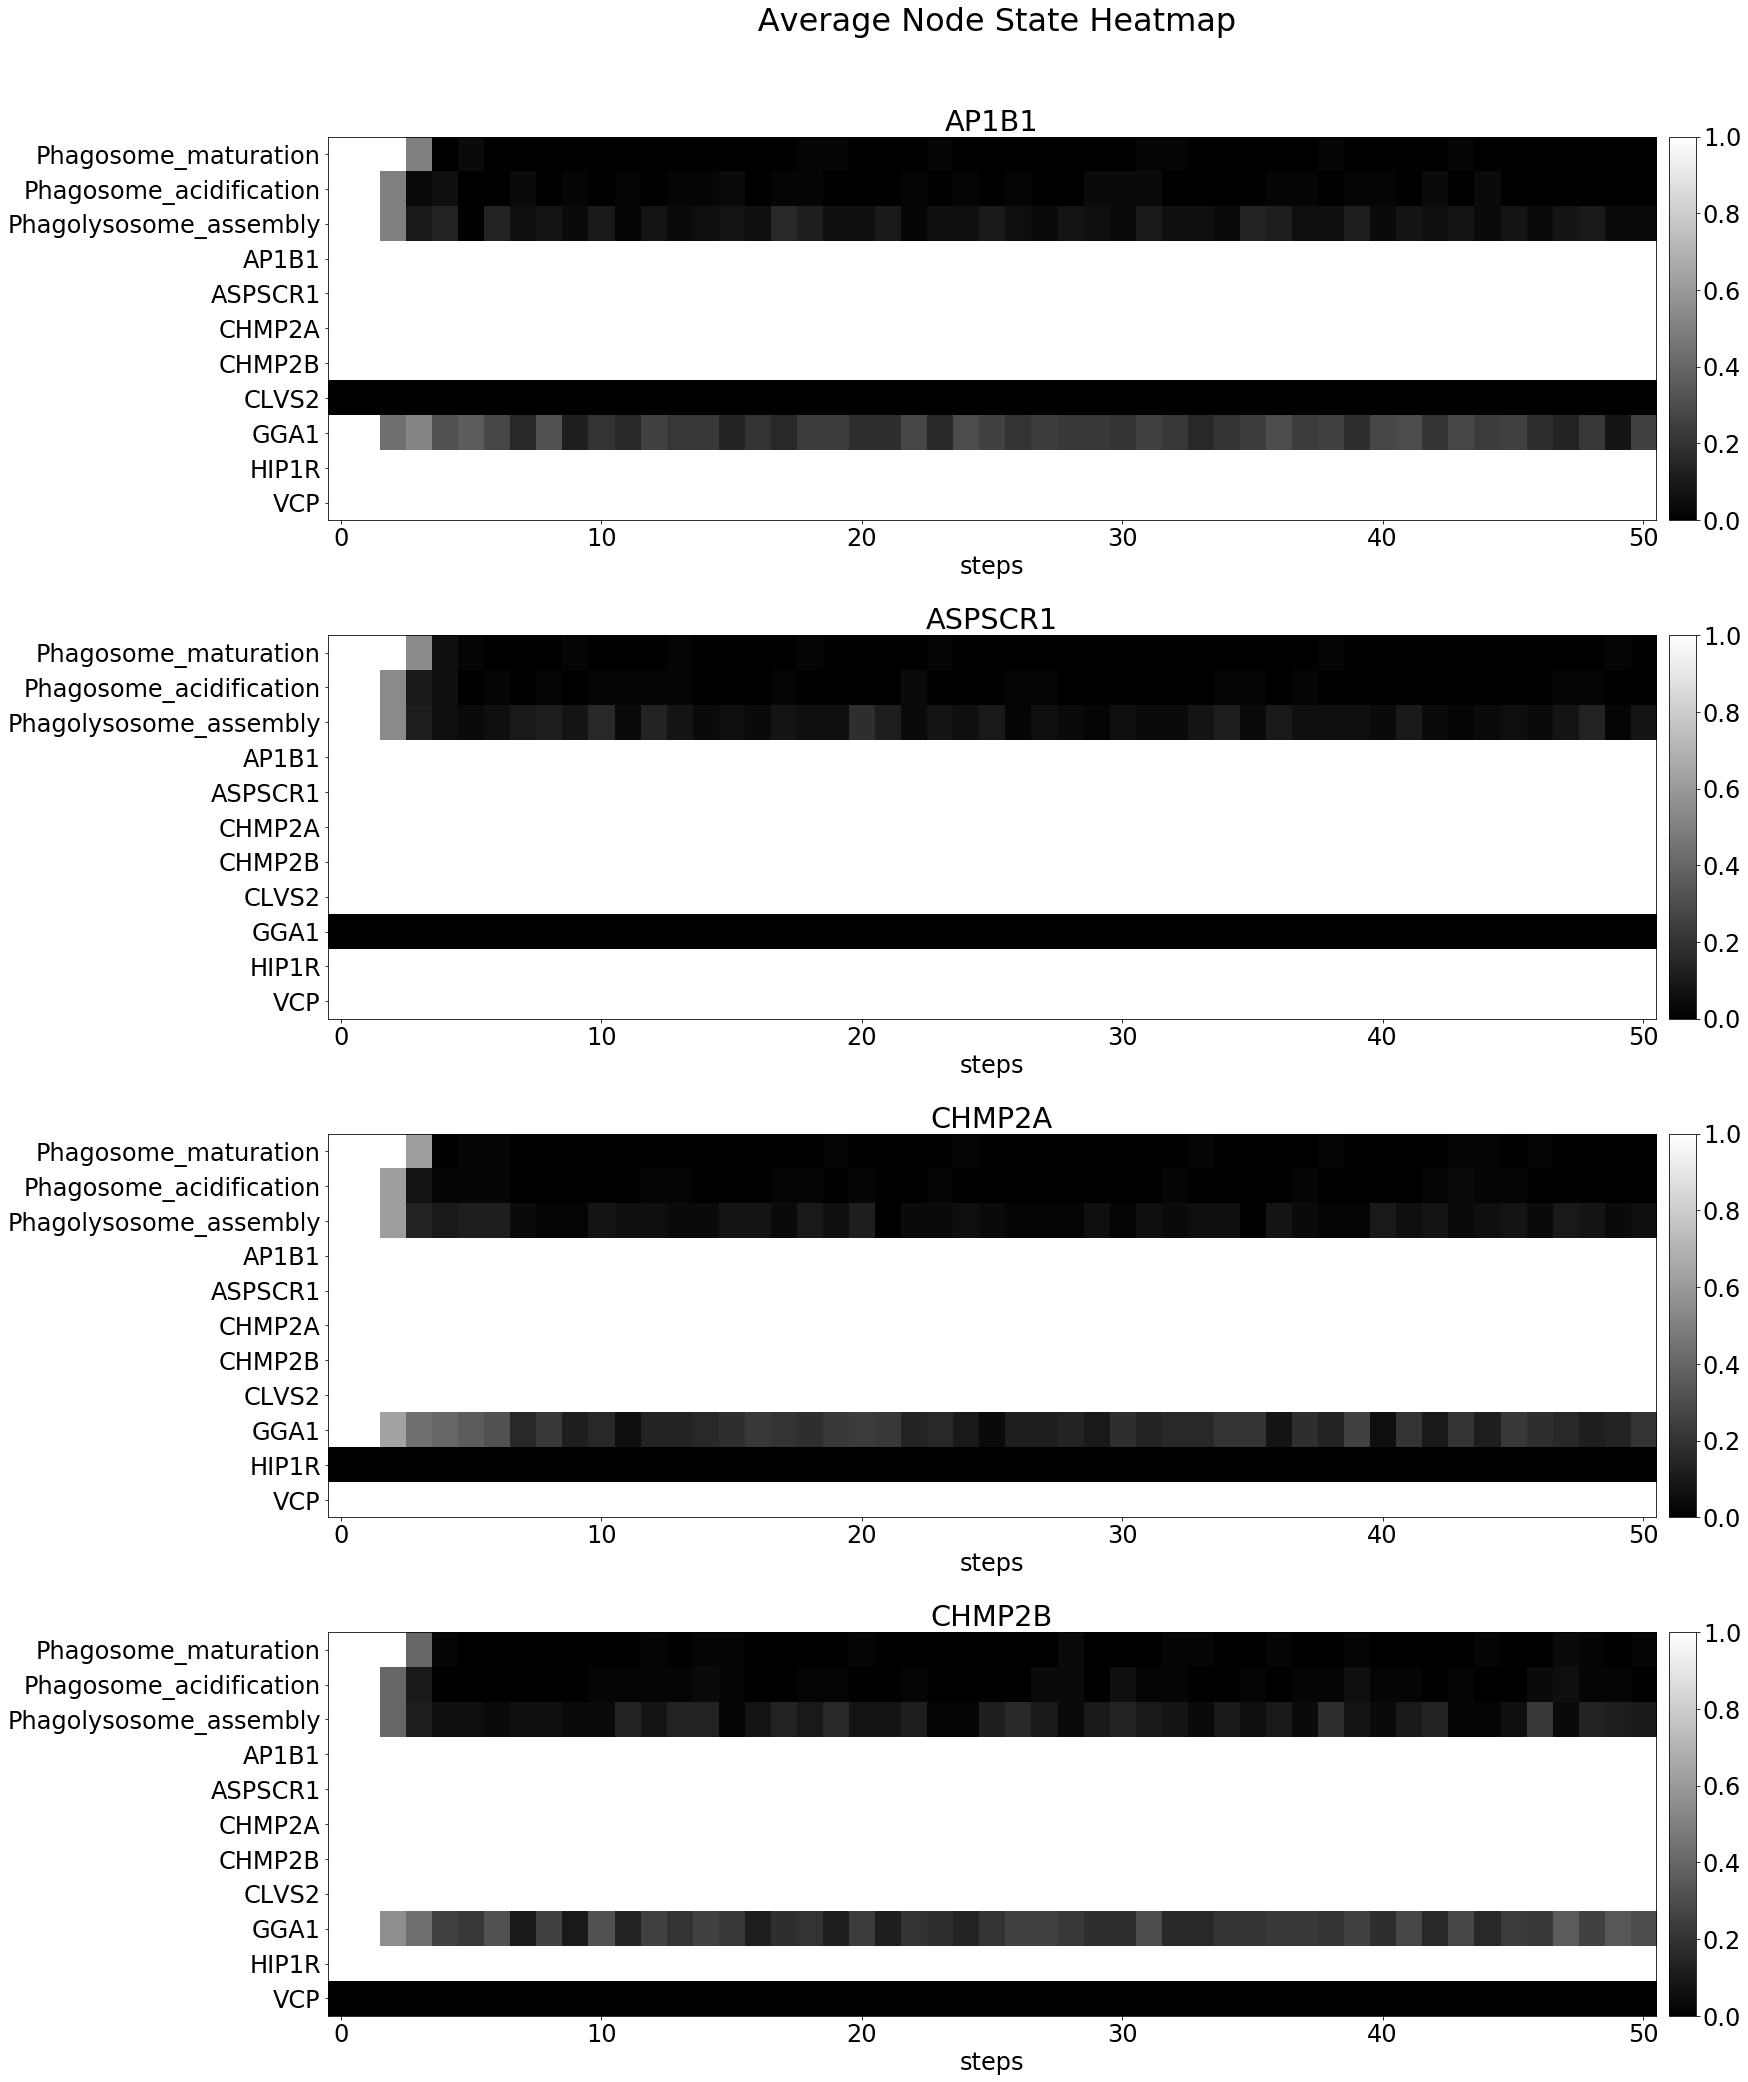

In [85]:
print "FIG 5B"
bm.plot_maps(B,
             titles=hit, 
             nodes = processes + sorted(hit),
                          
             top = 0.92,
             bottom=0.05,
             hspace = 0.3,            
             h = 7.5,
             w = 25,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

Appendix Figures

In [ ]:
# heatmap mtb all

print "FIG 7"
other = [node for node in models_mtb[0].nodes if not node in processes + complexes + hit + mtb ]
bm.plot_maps([avg_mtb],
             titles=['mtb'], 
             nodes = processes + sorted(complexes) + sorted(hit) + sorted(other) + sorted(mtb) ,
             h = 25,
             w = 28,
             top = 0.92,
             bottom=0.05,
             left=.25,
             fontsize = 20,
             suptitlesize = 30,
             suptitle='                                 Average Node State Heatmap' # white space to centre
            )


In [ ]:
# heatmap mtb one by one

definition_mtbOff = add_mtb2definition(definition, 'mtb-edgelist.csv', False)
avgs_mtbOneByOne = []
for factor in mtb:
    definition_loop = bm.switch(definition_mtbOff,on=[factor])
    models = bm.run_model(definition_loop, steps=50, runs=runs)
    avgs_mtbOneByOne.append(bm.average_models(models))

In [ ]:
print "FIG 8"
bm.plot_maps(avgs_mtbOneByOne,
             titles=mtb, 
             nodes = processes + mtb,
             h = 4,
             top = 0.92,
             bottom=0.1,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )

In [ ]:
# heatmap knockouts one by one

In [ ]:
avgs_knockoutsOneByOne = []
for factor in hit:
    definition_loop = bm.knockout(definition, [factor])
    models = bm.run_model(definition_loop, steps=50, runs=runs)
    avgs_knockoutsOneByOne.append(bm.average_models(models))

In [ ]:
print "FIG 9"
bm.plot_maps(avgs_knockoutsOneByOne,
             titles=hit, 
             nodes = processes + hit,
             h = 4,
             top = 0.92,
             bottom=0.1,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )

In [ ]:
# heatmap mtb one by one AND knockouts
definition_mtbOffANDknockouts = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', False)


In [ ]:
avgs_mtbOneByOneANDknockouts = []
for factor in mtb:
    definition_loop = bm.switch(definition_mtbOffANDknockouts, on=[factor])
    models = bm.run_model(definition_loop, steps=50, runs=runs)
    avg = bm.average_models(models)
    avgs_mtbOneByOneANDknockouts.append(avg)

In [ ]:
print "FIG 10"
bm.plot_maps(avgs_mtbOneByOneANDknockouts,
             titles=mtb, 
             nodes = processes + mtb,
             h = 4,
             top = 0.92,
             bottom=0.05,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )